In [3]:
import numpy as np
import matplotlib.pyplot as plt

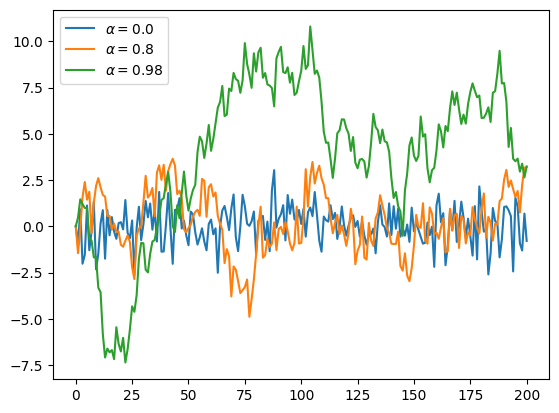

In [4]:
α_values = [0.0, 0.8, 0.98]
T = 200
x = np.empty(T+1)

for α in α_values:
    x[0] = 0
    for t in range(T):
        x[t+1] = α * x[t] + np.random.randn()
    plt.plot(x, label=f'$\\alpha = {α}$')

plt.legend()
plt.show()

# Accelerating Python Code with Numba

Written for the CBC Quantitative Economics Workshop (September 2022)
John Stachurski
This notebook contains a very quick introduction to Numba, as well as comparing Numba to NumPy.

We use the following imports

In [1]:
import numpy as np
from numba import vectorize, jit, float64
from quantecon.util import tic, toc


## Vectorization
In scipting languages, native loops are slow:

In [2]:
n = 10_000_000
x_vec = np.linspace(0.1, 1.1, n)

Let's say we want to compute the sum of of $\cos(2\pi / x)$ over $x$ in 

In [4]:
tic()
current_sum = 0.0
for x in x_vec:
    current_sum += np.cos(2 * np.pi / x)
toc()

TOC: Elapsed: 0:00:4.90


4.905025243759155

The reason is that Python, like most high level languages is dynamically typed.

This means that the type of a variable can freely change.

Moreover, the interpreter doesn't compile the whole program at once, so it doesn't know when types will change.

So the interpreter has to check the type of variables before any operation like addition, comparison, etc.

Hence there's a lot of fixed cost for each such operation

In [5]:
tic()
np.sum(np.cos( 2 * np.pi / x_vec ))
toc()

TOC: Elapsed: 0:00:0.07


0.07957887649536133

Now high level overheads are paid per *array* rather than per float or integer.

#### Implict Multithreading

Recent versions of Anaconda are compiled with Intel MKL support, which accelerates NumPy operations.

Watch system resources when you run this code.  

(For example, install `htop` (Linux / Mac), `perfmon` (Windows) or another system load monitor and set it running in another window.)

In [11]:
n = 20
m = 1000
for i in range(n):
    X = np.random.randn(m, m)
    λ = np.linalg.eigvals(X)

You should see all your cores light up.  With MKL, many matrix operations are automatically parallelized.

### Problems with Vectorization

Vectorization is neat but somewhat inflexible.

Some problems cannot be vectorized and need to be written in loops.

In other cases, loops are clearer than vectorized code.